In [2]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp
import matplotlib.pyplot as plt

In [3]:
def sir_ode(times,init,parms):
        a,b,p,g,d,r,e,= parms
        X,Y,Z = init
        dX = a*X-b*X*Y-p*X*Z
        dY = g*X*Y-d*Y
        dZ = r*X*Z-e*Z
        return [dX,dY,dZ]

In [4]:
times = np.linspace(0,100,2001)
parms = [1,1,1,1,1.5,1,2]
init = [2,0,1]

In [5]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t,y,parms),t_span=[min(times),max(times)],y0=init,t_eval=times)

sir_out = pd.DataFrame({"t":sir_sol["t"],"X":sir_sol["y"][0],"Y":sir_sol["y"][1],"Z":sir_sol["y"][2]})

plt.style.use("ggplot")

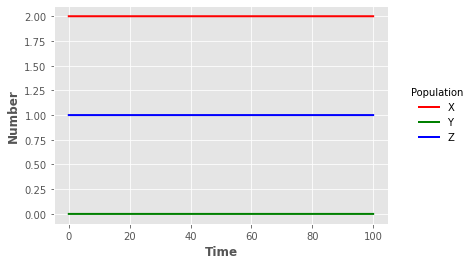

In [6]:
xline = plt.plot("t","X","",data=sir_out,color="red",linewidth=2)
yline = plt.plot("t","Y","",data=sir_out,color="green",linewidth=2)
zline = plt.plot("t","Z","",data=sir_out,color="blue",linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("Number",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)